In [280]:
# Hi, this notebook explains how to solve the Titanic competition on Kaggle.
# We will first visualise the data to get a feel of it, and then use Machine Learning to predict the Survival.

# Download the "train" and "test" datasets from https://www.kaggle.com/c/titanic/data
# They can also be found in my repository.

# Let's start by importing some useful libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns  # Great visualisation library by Stanford; built on top of matplotlib

# In order to see the output in the notebook itself
%matplotlib inline

In [281]:
from pandas import Series, DataFrame
# Let's load the data into pandas DataFrame
titanic_df = pd.read_csv("train_Titanic.csv", dtype={'Age':np.float64})
test_df = pd.read_csv("test_Titanic.csv", dtype={'Age':np.float64})

In [282]:
# Let's look at our data and their info
print titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [283]:
print test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [284]:
# Notice the missing values in both datasets.
# Also notice how there is no "Survived" column in test_df because that is what we have to predict! Duh. 
# Our main aim is to find the "Survived" value for each Passenger
# Write that data to a .csv file and submit it on Kaggle to see how we did.

In [285]:
# Before going there, let's analyse and visualise our data to get a feel of it.
# Remember, we need only useful features to be able to predict efficiently.
# Let's start from the first column^
# PassengerId: It is clearly of no use; just a serial no. Let's DROP it then. 
titanic_df.drop(['PassengerId'], axis=1, inplace=True)

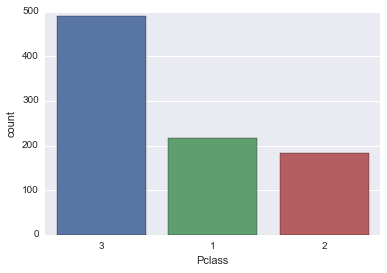

In [286]:
# Let's look at Pclass now:
# It is the class in which the passenger was travelling; can take on values 1, 2 and 3.
sns.countplot('Pclass', data=titanic_df)

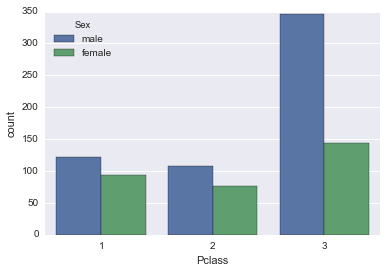

In [287]:
# Mostly 3rd class passengers, Let's see how many of them were male/female
sns.countplot('Pclass', hue='Sex', data=titanic_df, order=[1,2,3])

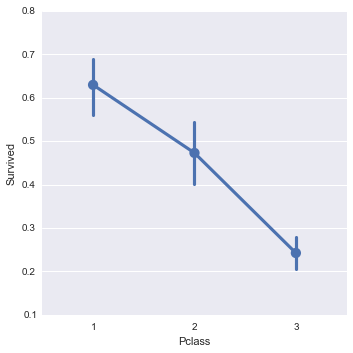

In [288]:
# Okay, this looks like what we expected! 
# Many males in the 3rd class. Somewhat equal proportion in the other two clases.
# Let's see how many of them survived:
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3], size=5)

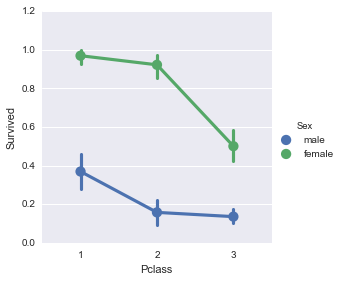

In [289]:
# The survival rate of 3rd class is much lower; investigate further if it's because of the high number of males
# Remember, "Women & Children first policy". So much for chauvinism.
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic_df, order=[1,2,3])

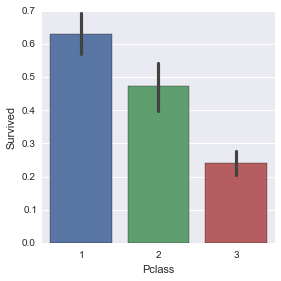

In [290]:
# Looks like being a male in 3rd class wasn't good at all for your survival.
# Infact, being a male decreases your chances of survival drastically. 
sns.factorplot('Pclass', 'Survived', data=titanic_df, kind='bar', order=[1,2,3])

In [291]:
# Let's move on to the next feature 'Name'
# Useless feature quite obviously. 
# Let's drop it
titanic_df.drop(['Name'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35,1,0,113803,53.1000,C123,S
4,0,3,male,35,0,0,373450,8.0500,NaN,S


In [292]:
# "Survived" == 0 indicates "DID NOT Survive"; 1 == "Survived"
# Now, we've looked at features uptil Pclass; Next is "Sex"

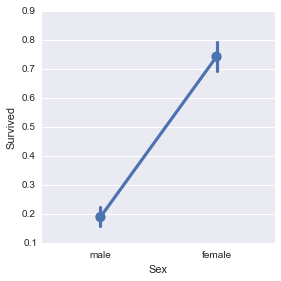

In [293]:
# Let's look at Sex and Age simultaneously (kind of) to gain better insight.
sns.factorplot('Sex', 'Survived', data=titanic_df)

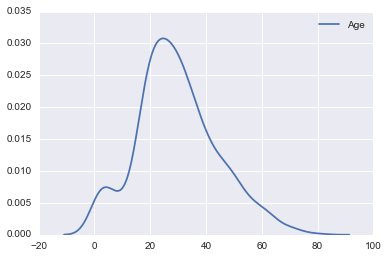

In [294]:
sns.kdeplot(titanic_df['Age'])

In [295]:
# There are many children, so let's study them separately.
# Convert "Sex" into "Person" column which can take values: "Male", "Female", "Child"
# Let's create a function for that
def what_person(passenger):
    age,sex = passenger
    if age <= 16:
        return 'Child'
    else: 
        return sex

In [296]:
# Let's "apply" now
titanic_df["Person"] = titanic_df[['Age','Sex']].apply(what_person, axis=1)
# axis=1 specifies that the operation is to be done on columns!
# Drop "Sex" now, since it is redundant
titanic_df.drop(['Sex'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,0,3,22,1,0,A/5 21171,7.2500,NaN,S,male
1,1,1,38,1,0,PC 17599,71.2833,C85,C,female
2,1,3,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,1,1,35,1,0,113803,53.1000,C123,S,female
4,0,3,35,0,0,373450,8.0500,NaN,S,male


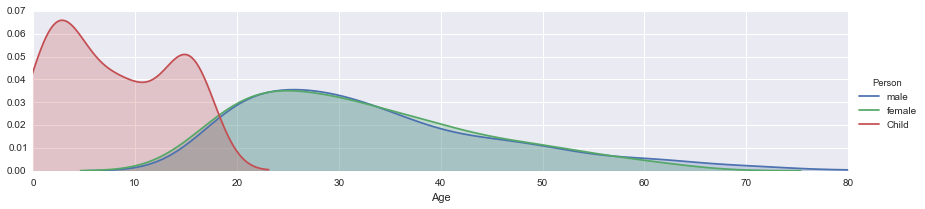

In [297]:
fig = sns.FacetGrid(data=titanic_df, hue="Person", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()

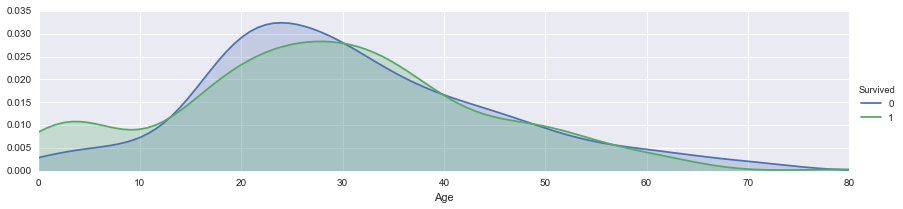

In [298]:
fig = sns.FacetGrid(data=titanic_df, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, titanic_df['Age'].max()))
fig.add_legend()

In [299]:
print titanic_df.info()
print "###############"
print "Missing Age values:", titanic_df['Age'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Person      891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
None
###############
Missing Age values: 177


In [300]:
# Let's fill the missing^ Age values now
# Generate random numbers between mean-std & mean+std
mean = titanic_df['Age'].mean()
std = titanic_df['Age'].std()

for i in range(177):
    r = np.random.randint(mean-std, mean+std)
    titanic_df["Age"].fillna(r, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Person      891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


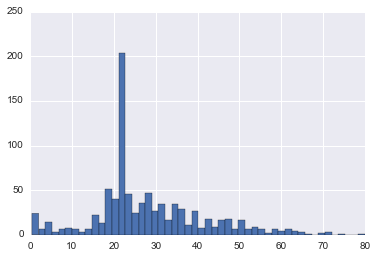

In [301]:
titanic_df['Age'].hist(bins=50)

In [302]:
# Let's look at next two features:
# SibSp is any siblings/spouses on board?
# Parch is any parent/child on board?
# We could reduce these to a single feature: "WithFamily"?
# This would make our feature-vector more efficient and dimensionality reduction!!
titanic_df['WithFamily'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.drop(['SibSp','Parch'], axis=1, inplace=True)
titanic_df.head(15)

,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Person,WithFamily
0,0,3,22,A/5 21171,7.2500,NaN,S,male,1
1,1,1,38,PC 17599,71.2833,C85,C,female,1
2,1,3,26,STON/O2. 3101282,7.9250,NaN,S,female,0
3,1,1,35,113803,53.1000,C123,S,female,1
4,0,3,35,373450,8.0500,NaN,S,male,0
5,0,3,22,330877,8.4583,NaN,Q,male,0
6,0,1,54,17463,51.8625,E46,S,male,0
7,0,3,2,349909,21.0750,NaN,S,Child,4
8,1,3,27,347742,11.1333,NaN,S,female,2
9,1,2,14,237736,30.0708,NaN,C,Child,1


In [303]:
# Let's clean that!
# If "WithFamily" == 0, He was alone. Hence, value should be 0.
titanic_df['WithFamily'].loc[titanic_df['WithFamily'] > 0] = 1
titanic_df.head(15)

,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Person,WithFamily
0,0,3,22,A/5 21171,7.2500,NaN,S,male,1
1,1,1,38,PC 17599,71.2833,C85,C,female,1
2,1,3,26,STON/O2. 3101282,7.9250,NaN,S,female,0
3,1,1,35,113803,53.1000,C123,S,female,1
4,0,3,35,373450,8.0500,NaN,S,male,0
5,0,3,22,330877,8.4583,NaN,Q,male,0
6,0,1,54,17463,51.8625,E46,S,male,0
7,0,3,2,349909,21.0750,NaN,S,Child,1
8,1,3,27,347742,11.1333,NaN,S,female,1
9,1,2,14,237736,30.0708,NaN,C,Child,1


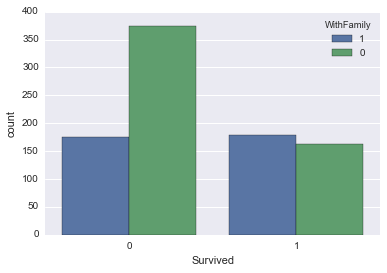

In [304]:
sns.countplot('Survived', data=titanic_df, hue='WithFamily')

In [305]:
# Next feature is Ticket, which is useless again. Remove it!
titanic_df.drop(['Ticket'], axis=1, inplace=True)
print test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB
None


In [306]:
# Fare:
# Missing values only in test_df
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# Convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

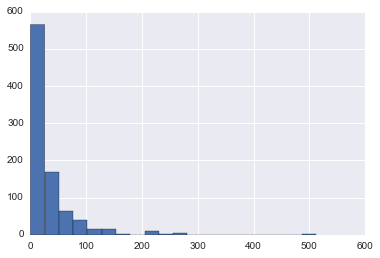

In [307]:
titanic_df['Fare'].hist(bins=20)

In [308]:
# Let's see if they vary with Survival chances
fare_notSurvived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived = titanic_df['Fare'][titanic_df["Survived"] == 1]
print "Died: ", fare_notSurvived.mean()
print "Survived: ", fare_survived.mean()

Died:  21.6903460838
Survived:  47.9912280702


In [309]:
# That was interesting.
titanic_df.head()

,Survived,Pclass,Age,Fare,Cabin,Embarked,Person,WithFamily
0,0,3,22,7,NaN,S,male,1
1,1,1,38,71,C85,C,female,1
2,1,3,26,7,NaN,S,female,0
3,1,1,35,53,C123,S,female,1
4,0,3,35,8,NaN,S,male,0


In [310]:
# Now, we've looked at "Survived" "Pclass" "Age" "Fare"
# Created two new features/columns "Person" "WithFamily"; also dropped some columns 
# Let's look at Cabin now:

In [311]:
# Cabin is in the format: C85 where the first letter ('C', in this case) is the deck
# Deck seems to give out important info as compared to the room no. 
# Let's extract all decks from Cabin; let's drop null values first!
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

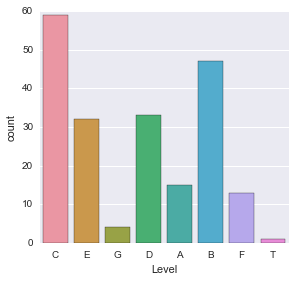

In [312]:
floor = []
for level in deck:
    floor.append(level[0])

# To visualise it, let's convert it into a DataFrame
df = DataFrame(floor, columns=['Level'])
sns.factorplot('Level', kind='count', data=df)

In [313]:
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int64
Cabin         204 non-null object
Embarked      889 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB
None


In [314]:
# As you can see, the 'Cabin' column has a lot of missing values.
# On top of that, there is just one value for deck 'T' which doesn't make a lot of sense.
# Filling 75% of the values on our own would affect prediction
# Hence, it is better to drop this column
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,Fare,Embarked,Person,WithFamily
0,0,3,22,7,S,male,1
1,1,1,38,71,C,female,1
2,1,3,26,7,S,female,0
3,1,1,35,53,S,female,1
4,0,3,35,8,S,male,0


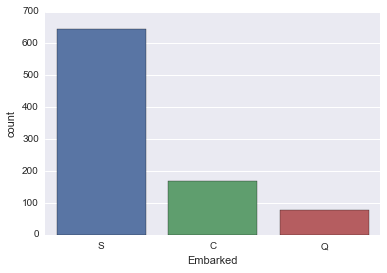

In [315]:
# Let's look at our last feature: Embarked
sns.countplot('Embarked', data=titanic_df)

In [316]:
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int64
Embarked      889 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 55.7+ KB
None


In [317]:
# Just two missing values! Let's fill it with "S" (the most frequent)
titanic_df['Embarked'].fillna("S", inplace=True)
# In case you don't know, the "inplace"^ here just makes the change permanent.
# Otherwise, I'd have to do something like:
# titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")
print titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int64
Embarked      891 non-null object
Person        891 non-null object
WithFamily    891 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 55.7+ KB
None


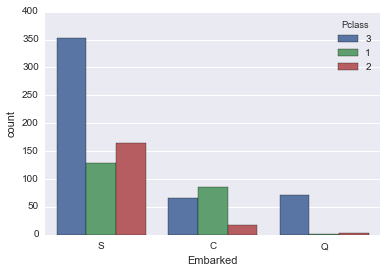

In [318]:
sns.countplot('Embarked', hue='Pclass', data=titanic_df)

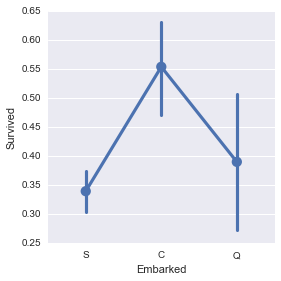

In [319]:
# Allmost all the passengers from Queenstown (Q) were travelling in 3rd class.
# Btw, you can read more about what these features represent at https://www.kaggle.com/c/titanic/data
# Let's look at who survived
sns.factorplot('Embarked', 'Survived', data=titanic_df)

In [320]:
# Passengers that embarked at "S" had a less rate of survival; Let's confirm that:
embark = titanic_df[['Embarked', 'Survived']].groupby(['Embarked']).mean()
print embark

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


In [328]:
# Okay, now we've looked at all the features!
# Let's bring in Machine Learning. 
# We'll classify using Random Forests
# If you're new to Random Forests, look it up on the web.
# It's basically a collection of Decision Trees! 
# However, sklearn is going to do all the job with just a few lines of code.